In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()
print("Keys:\n{}".format(boston.keys()))

Keys:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
print("Shape of Data: {}".format(boston.data.shape))

Shape of Data: (506, 13)


In [8]:
X, y = mglearn.datasets.load_extended_boston()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [9]:
# Printing R^2
print("R^2 on Training Set: {:.2f}".format(lr.score(X_train, y_train)))
print("R^2 on Test Set: {:.2f}".format(lr.score(X_test, y_test)))

# So high score on training and less on test. This is clearly overfitting. 

R^2 on Training Set: 0.95
R^2 on Test Set: 0.61


### Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [11]:
# Printing R^2
print("R^2 on Training set: {:.2f}".format(ridge.score(X_train, y_train)))
print("R^2 on Test set: {:.2f}".format(ridge.score(X_test, y_test)))

R^2 on Training set: 0.89
R^2 on Test set: 0.75


In [14]:
# Printing coeff
#print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))

ridge.intercept_: 21.390525958609793


In [15]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [24]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


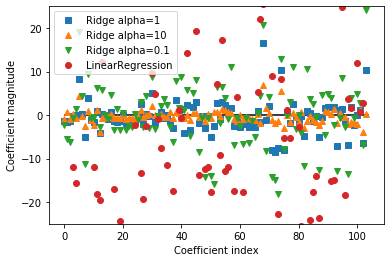

In [25]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

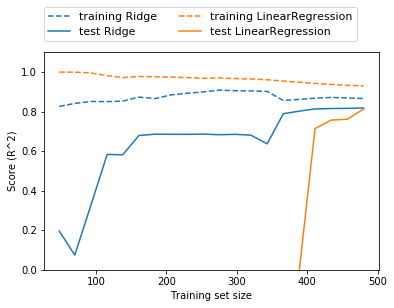

In [26]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [28]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

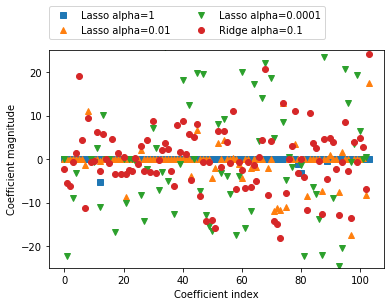

In [30]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")